# TP N°1 Regresión Lineal y Polinómica
* Dado el conjunto de datos, plantear una regresión lineal (grado 1) y analizar si ese modelo es el óptimo para los datos dados.
* Luego plantear una regresión polinómica (defina el grado del polinomio que mejor se adpate a los datos)
* Realice para todos los casos, el grafi simultáneo de los datos y el modelo generado.
* Analizar resultados.  
## 1. Conjunto de Datos

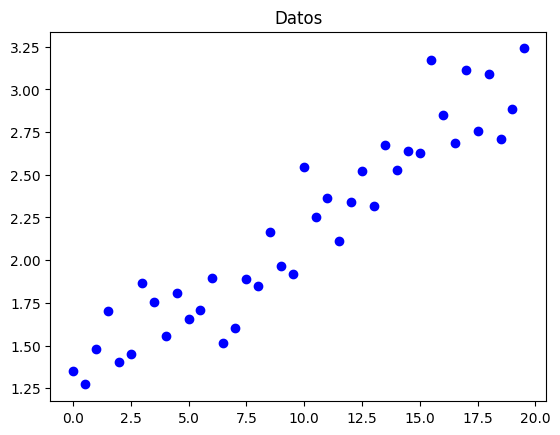

In [ ]:
import numpy as np #Librería numérica
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
%matplotlib inline
# Si quieres hacer estos gráficos dentro de un jupyter notebook
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn

def f(x):  # función f(x) = 0.1*x + 1.25 + 0.2*Ruido_Gaussiano
    np.random.seed(42) # para poder reproducirlo
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

x = np.arange(0, 20, 0.5) # generamos valores x de 0 a 20 en intervalos de 0.5
y = f(x) # calculamos y a partir de la función que hemos generado

# hacemos un gráfico de los datos que hemos generado
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');

## 2. Regresión Lineal

In [ ]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression
...

Ellipsis

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

modelo_regresion = LinearRegression()
modelo_regresion.fit(x.reshape(-1, 1), y)

# Predecimos los valores de y usando el modelo
prediccion_y = modelo_regresion.predict(x.reshape(-1, 1))

# Calculamos el MSE
mse = mean_squared_error(y, prediccion_y)

# Calculamos el RMSE
rmse = np.sqrt(mse)



print('w = '+str(modelo_regresion.coef_)+ '   b = '+str(modelo_regresion.intercept_))
print("="*60)
print('Error Cuadrático Medio (MSE) =', mse)
print('Raíz del Error Cuadrático Medio (RMSE) =', rmse)

w = [0.09183522]   b = 1.2858792525736682
Error Cuadrático Medio (MSE) = 0.03318522012927899
Raíz del Error Cuadrático Medio (RMSE) = 0.18216810952875093


In [ ]:
# calculamos el coeficiente de determinación R2
r2 = modelo_regresion.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.8943593637683117


Tengo 3 valores de error el MSE, el RMSE y el R2, con valores distintos, pero como ¿para una función de error el modelo es mejor que para otra función de error?

Indicar el valor de los parámetros calculados para el modelo.


Entendiendo que el MSE y el RMSE son valores de variacions absolutos, mientras que el R2 está comprendido entre 0 y 1; compararlos como si fueran iguales sería un error.

Como sabemos que los valores de x van de 0 a 20; consideramos los errores cuadráticos buenos valores.
Al mismo tiempo, el R2 es un buen valor que no llega a calificarse como overfitting.

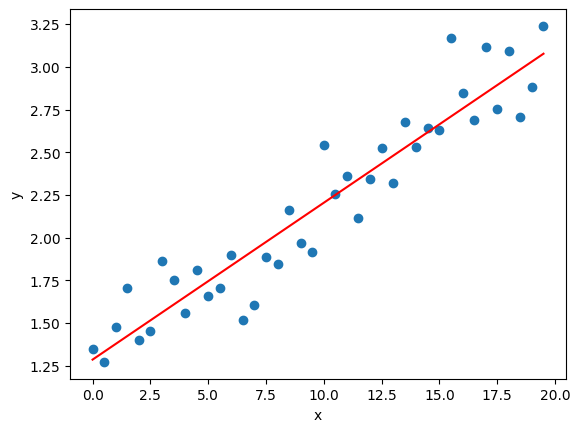

In [ ]:
plt.scatter(x,y)
prediccion = modelo_regresion.predict(x.reshape(-1,1))
plt.plot(x,prediccion,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#Fórmula de hipótesis
print('y='+str(modelo_regresion.coef_)+ 'x+'+str(modelo_regresion.intercept_))

y=[0.09183522]x+1.2858792525736682


## 3. Regresión Polinómica
Definir el grado del polinomio

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# definir el grado del polinomio
polinomio_1 = PolynomialFeatures(degree=5, include_bias=False) # completar xxxx con el grado del polinomio
print(polinomio_1)

PolynomialFeatures(degree=5, include_bias=False)


In [ ]:
polinomio_1.fit(x.reshape(-1,1))

PolynomialFeatures(degree=5, include_bias=False)

In [ ]:
x_1 = polinomio_1.transform(x.reshape(-1,1))

In [ ]:
x_1 # verificamos que se haya calculado correctamente x_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.00000000e-01, 2.50000000e-01, 1.25000000e-01, 6.25000000e-02,
        3.12500000e-02],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.50000000e+00, 2.25000000e+00, 3.37500000e+00, 5.06250000e+00,
        7.59375000e+00],
       [2.00000000e+00, 4.00000000e+00, 8.00000000e+00, 1.60000000e+01,
        3.20000000e+01],
       [2.50000000e+00, 6.25000000e+00, 1.56250000e+01, 3.90625000e+01,
        9.76562500e+01],
       [3.00000000e+00, 9.00000000e+00, 2.70000000e+01, 8.10000000e+01,
        2.43000000e+02],
       [3.50000000e+00, 1.22500000e+01, 4.28750000e+01, 1.50062500e+02,
        5.25218750e+02],
       [4.00000000e+00, 1.60000000e+01, 6.40000000e+01, 2.56000000e+02,
        1.02400000e+03],
       [4.50000000e+00, 2.02500000e+01, 9.11250000e+01, 4.10062500e+02,
        1.84528125e+03],
       [5.00000000e+00, 2.5000

In [ ]:
model = LinearRegression().fit(x_1, y)

In [ ]:
print(f"coefficients: {model.coef_}")

coefficients: [ 2.67155440e-01 -7.46124217e-02  1.00274430e-02 -5.38979619e-04
  1.01191067e-05]


In [ ]:
print(f"intercept: {model.intercept_}")

intercept: 1.2770299104732854


In [ ]:
r_sq = model.score(x_1, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9111724760963863


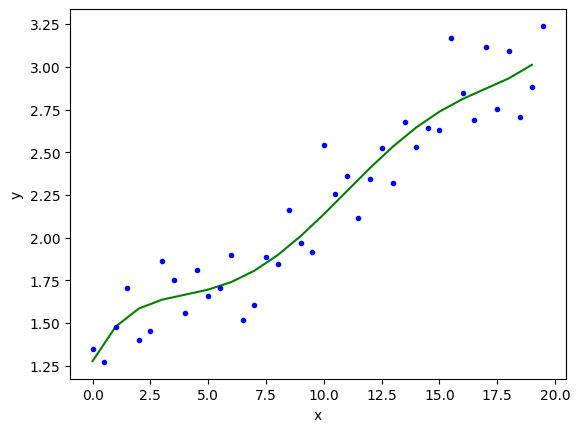

In [ ]:
# Representación gráfica de la función hipótesis generada
x1 = np.arange(0,20,1)
y1 = model.coef_[0]*x1+model.coef_[1]*x1**2+model.coef_[2]*x1**3+model.coef_[3]*x1**4+model.coef_[4]*x1**5+model.intercept_

plt.plot(x1, y1, "g-")  # estilo de linea solida verde
plt.plot(x, y, "b.")  # círculos azules
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Conclusiones:
* ¿Cual es el modelo con el cual obtenemos el mejor resultado?

Viendo la forma que toman los valores de y(x) consideramos que la regresion lieal obtendrá mejores resultados. O en su defecto una polinomial con grado menor a 3.